In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"D:\ExcelR Assignments\Question\Neural networks\Neural networks\Alphabets_data.csv")

In [3]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
data.duplicated().sum()

1332

In [5]:
data.drop_duplicates(inplace  = True)
data.reset_index(drop = 'first', inplace = True)

In [6]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

<Axes: >

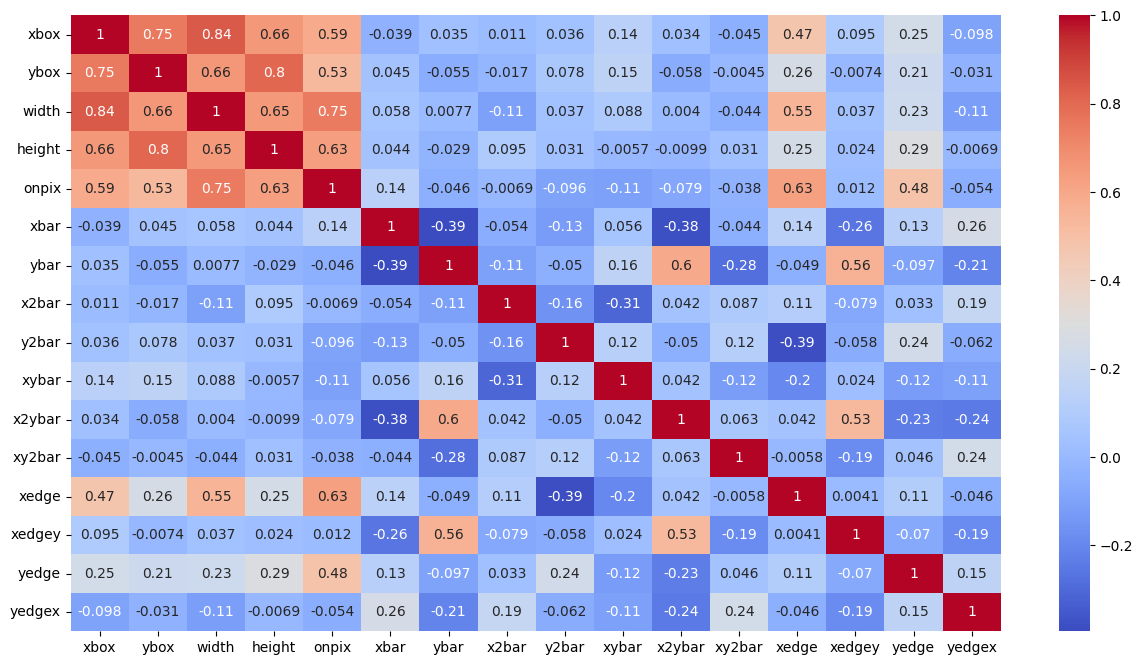

In [7]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

In [8]:
le = LabelEncoder()
data['letter'] = le.fit_transform(data['letter'])

In [9]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,19,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
18664,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
18665,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
18666,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [10]:
minmax = MinMaxScaler()
encode_col = data.drop('letter', axis = 1).columns
data[encode_col] = minmax.fit_transform(data[encode_col])

In [11]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,0.133333,0.533333,0.200000,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,8,0.333333,0.800000,0.200000,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,3,0.266667,0.733333,0.400000,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,13,0.466667,0.733333,0.400000,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,6,0.133333,0.066667,0.200000,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,19,0.333333,0.533333,0.466667,0.466667,0.466667,0.466667,0.600000,0.266667,0.533333,0.466667,0.466667,0.533333,0.200000,0.666667,0.533333,0.400000
18664,3,0.133333,0.133333,0.200000,0.200000,0.133333,0.466667,0.466667,0.466667,0.400000,0.400000,0.400000,0.266667,0.133333,0.533333,0.200000,0.466667
18665,2,0.466667,0.666667,0.533333,0.533333,0.266667,0.266667,0.533333,0.400000,0.600000,0.800000,0.600000,0.866667,0.133333,0.600000,0.200000,0.466667
18666,19,0.400000,0.600000,0.400000,0.466667,0.333333,0.400000,0.733333,0.200000,0.466667,0.733333,0.600000,0.333333,0.133333,0.800000,0.133333,0.266667


In [12]:
x = data.drop('letter', axis = 1)
y = data[['letter']]

In [13]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [72]:
def build_model(hp):  # `hp` is passed automatically by Keras Tuner during search
    model = Sequential()
    # Input layer
    model.add(Dense(
        hp.Int('units_input', min_value=64, max_value=256, step=32),  # Search for units
        activation='relu', 
        input_dim=x_train.shape[1]
    ))

    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):  # Search for number of layers (1 to 3 layers)
        model.add(Dense(
            hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),  # Search for units per layer
            activation='relu'
        ))
        
        if hp.Boolean(f'dropout_{i}'):  # Search for whether to use dropout or not
            model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', 0.1, 0.5, step=0.1)))  # Search for dropout rate

    # Output layer
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))

    # Compile model with search for learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.1, 0.01, 1.0])),  # Search learning rate
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [73]:
# Initialize Keras Tuner with Random Search
tuner = kt.RandomSearch(
    build_model,  # The function that defines the model architecture
    objective='val_accuracy',  # What metric we want to optimize
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of times to train the model for each trial
    project_name='ann_tuning'  # Name of the project
)

# Perform the search for the best hyperparameters
tuner.search(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Trial 10 Complete [00h 00m 27s]
val_accuracy: 0.8992857336997986

Best val_accuracy So Far: 0.9114285707473755
Total elapsed time: 00h 04m 25s


In [111]:
best_model = tuner.get_best_hyperparameters(num_trials=1)[0]

In [116]:
print(best_model.values)

{'units_input': 192, 'num_layers': 1, 'units_0': 128, 'dropout_0': False, 'learning_rate': 0.01, 'dropout_rate_0': 0.30000000000000004, 'units_1': 96, 'dropout_1': False, 'units_2': 32, 'dropout_2': False, 'dropout_rate_1': 0.5, 'dropout_rate_2': 0.5}


In [151]:
def train_ann(x_train, x_test, x_val, y_train, y_val, y_test):
    # Build the ANN model
    model = Sequential()
    model.add(Dense(128, input_dim = x_train.shape[1], activation='relu')) # Input layer
    model.add(Dense(64, activation='relu'))  # Hidden layer 1
    model.add(Dense(32, activation='relu'))  # Hidden layer 2
    model.add(Dense(16, activation='relu'))  # Hidden layer 3
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer


    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # For integer-encoded labels
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(x_train, y_train, epochs = 30, batch_size = 32, 
                        validation_data=(x_val, y_val))
    
    # Print final test accuracy
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Test Loss: {loss}")
    print(f"Test Accuracy: {accuracy}")
    
    y_pred_probs_1 = model.predict(x_test)
    y_pred_1 = np.argmax(y_pred_probs_1, axis=1)
    
    print(classification_report(y_test, y_pred_1))
    
    return model, history


In [152]:
ann_model = train_ann(x_train, x_test, x_val, y_train, y_val, y_test)

Epoch 1/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1140 - loss: 3.0759 - val_accuracy: 0.4046 - val_loss: 2.0107
Epoch 2/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4275 - loss: 1.8728 - val_accuracy: 0.5007 - val_loss: 1.6566
Epoch 3/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5163 - loss: 1.6090 - val_accuracy: 0.5468 - val_loss: 1.4742
Epoch 4/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5573 - loss: 1.4588 - val_accuracy: 0.6054 - val_loss: 1.3305
Epoch 5/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6146 - loss: 1.2965 - val_accuracy: 0.6346 - val_loss: 1.2261
Epoch 6/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6266 - loss: 1.2209 - val_accuracy: 0.6457 - val_loss: 1.1531
Epoch 7/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6580 - loss: 1.1120 - val_accuracy: 0.6754 - val_loss: 1.0829
Epoch 8/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6761 - loss: 1.0656 - val_accuracy: 0.

In [128]:
best_ann= build_model(best_model)

# Summarize the model architecture
best_ann.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 192)                 │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,322 (122.35 KB)

 Trainable params: 31,322 (122.35 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
best_ann.fit(x_train, y_train, epochs=25, validation_data=(x_val, y_val))

Epoch 1/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9255 - loss: 0.2182 - val_accuracy: 0.9136 - val_loss: 0.2660
Epoch 2/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9257 - loss: 0.2144 - val_accuracy: 0.8632 - val_loss: 0.4776
Epoch 3/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9094 - loss: 0.2886 - val_accuracy: 0.9057 - val_loss: 0.2910
Epoch 4/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9312 - loss: 0.2121 - val_accuracy: 0.9218 - val_loss: 0.2491
Epoch 5/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9316 - loss: 0.1971 - val_accuracy: 0.9125 - val_loss: 0.2821
Epoch 6/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9344 - loss: 0.1957 - val_accuracy: 0.8936 - val_loss: 0.3585
Epoch 7/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9259 - loss: 0.2225 - val_accuracy: 0.9250 - val_loss: 0.2365
Epoch 8/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9251 - loss: 0.2265 - val_accuracy: 0.

In [131]:
loss1, acc = best_ann.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc}")

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9360 - loss: 0.2563
Test Accuracy: 0.9346662163734436


In [132]:
y_pred = best_ann.predict(x_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [134]:
y_pred_probs = best_ann.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [137]:
np.argmax(y_pred_probs, axis = 1)

array([10, 19,  5, ..., 18,  2,  6], dtype=int64)

In [138]:
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       111
           1       0.94      0.92      0.93       123
           2       0.91      0.91      0.91       121
           3       0.87      0.93      0.90       114
           4       0.96      0.97      0.97       105
           5       0.96      0.90      0.93       116
           6       0.94      0.89      0.91       119
           7       0.92      0.85      0.89        95
           8       0.97      0.92      0.95        93
           9       0.87      0.99      0.93       105
          10       0.92      0.92      0.92       122
          11       0.97      0.96      0.96       112
          12       0.91      1.00      0.95        95
          13       0.92      0.95      0.93        95
          14       0.89      0.95      0.92        83
          15       0.98      0.91      0.94       136
          16       0.95      0.97      0.96       103
          17       0.89    